# Introduction

In [ ]:
"""
What? Visualization of MLP weights on MNIST

Sometimes looking at the learned coefficients of a neural network can provide insight into the learning behavior. 
For example if weights look unstructured, maybe some were not used at all, or if very large coefficients exist, 
maybe regularization was too low or the learning rate too high.
"""

# Import modules

In [16]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from matplotlib import rcParams

# Load dataset

In [ ]:
"""
The input data consists of 28x28 pixel handwritten digits, leading to 784 features in the dataset. 
"""

In [7]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# Rescale the data
X = X / 255.0

In [8]:
# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

# Create a MLP

In [ ]:
"""
Deep feedforward networks, also called feedforward neural networks, or multilayer perceptrons (MLPs), are the
quintessential deep learning models.
"""

In [ ]:
"""
The advantages of Multi-layer Perceptron are:
    [1] Capability to learn non-linear models.
    [2] Capability to learn models in real-time (on-line learning) using partial fit.

The disadvantages of Multi-layer Perceptron (MLP) include:
    [1] MLP with hidden layers have a non-convex loss function.
    [2] MLP requires tuning a number of hyperparameters (No. of hidden neurons, layers, and iterations).
    [3] MLP is sensitive to feature scaling.
"""

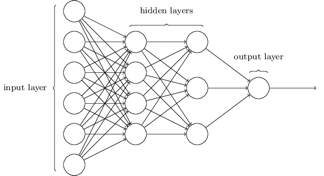

In [12]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), 
                    max_iter = 20, 
                    alpha=1e-4,
                    solver = 'sgd', 
                    verbose = 10, 
                    random_state=1,
                    learning_rate_init=.1)

In [18]:
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), 
                    max_iter = 40, 
                    alpha=1e-4,
                    solver = 'sgd', 
                    verbose = 10, 
                    random_state=1,
                    learning_rate_init=.1)

In [13]:
# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Iteration 11, loss = 0.04082169
Iteration 12, loss = 0.03828222
Iteration 13, loss = 0.03557957
Iteration 14, loss = 0.03054891
Iteration 15, loss = 0.02924761
Iteration 16, loss = 0.02610471
Iteration 17, loss = 0.02363894
Iteration 18, loss = 0.02208186
Iteration 19, loss = 0.01932900
Iteration 20, loss = 0.01830387


In [11]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.986800
Test set score: 0.970000


In [19]:
# this example won't converge because of CI's time constraints, so we catch the
# warning and are ignore it here
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp1.fit(X_train, y_train)

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Iteration 11, loss = 0.04082169
Iteration 12, loss = 0.03828222
Iteration 13, loss = 0.03557957
Iteration 14, loss = 0.03054891
Iteration 15, loss = 0.02924761
Iteration 16, loss = 0.02610471
Iteration 17, loss = 0.02363894
Iteration 18, loss = 0.02208186
Iteration 19, loss = 0.01932900
Iteration 20, loss = 0.01830387
Iteration 21, loss = 0.01639227
Iteration 22, loss = 0.01392950
Iteration 23, loss = 0.01270193
Iteration 24, loss = 0.01234102
Iteration 25, loss = 0.01081313
Iteration 26, loss = 0.01028644
Iteration 27, loss = 0.00896707
Iteration 28, loss = 0.00744908
Iteration 29, loss = 0.00707946
Iteration 30, loss = 0.00573869
Iteration 31, loss = 0.00499554
Iteration 32, los

In [20]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.996883
Test set score: 0.972300


# Plotting

In [ ]:
"""
Therefore the first layer weight matrix have the shape (784, hidden_layer_sizes[0]). We can therefore visualize
a single column of the weight matrix as a 28x28 pixel image.

To make the example run faster, we use very few hidden units, and train only for a very short time. Training 
longer would result in weights with a much smoother spatial appearance. The example will throw a warning because
it doesn’t converge, in this case this is what we want because of CI’s time constraints.
"""

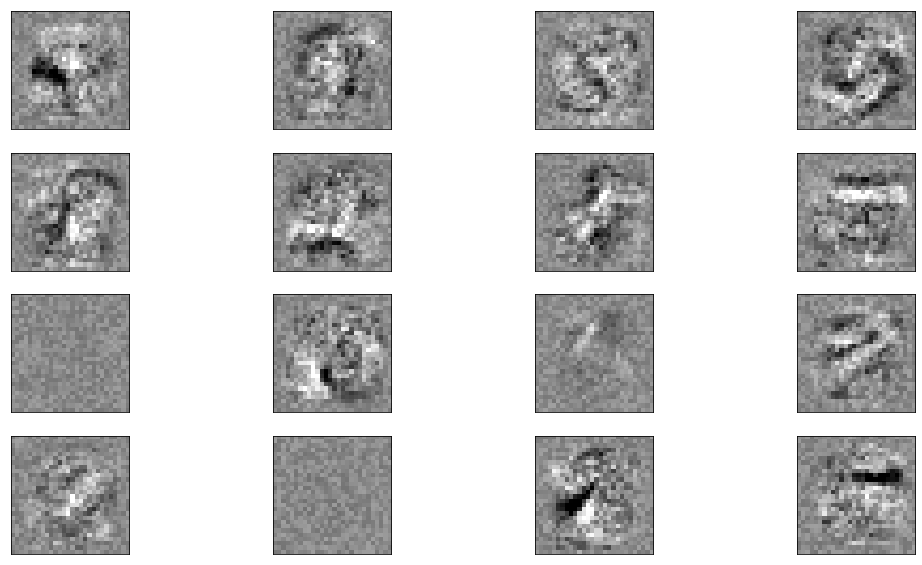

In [17]:
rcParams['figure.figsize'] = 18, 10
rcParams['font.size'] = 20

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

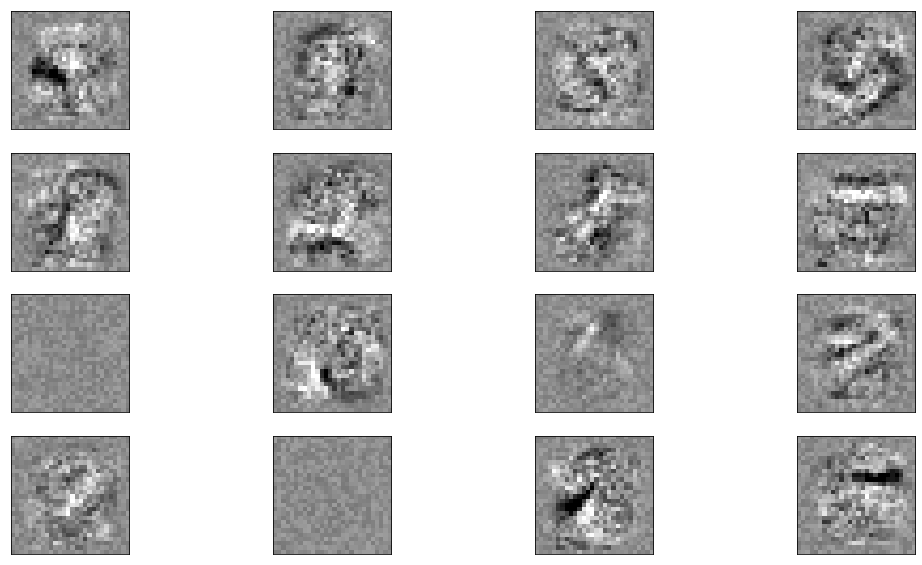

In [21]:
rcParams['figure.figsize'] = 18, 10
rcParams['font.size'] = 20

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp1.coefs_[0].min(), mlp1.coefs_[0].max()
for coef, ax in zip(mlp1.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

# References

- https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html#sphx-glr-auto-examples-neural-networks-plot-mnist-filters-py